In [23]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
from time import time
from datetime import timedelta
import mercury as mr 
import warnings
warnings.filterwarnings('ignore')

In [24]:
app = mr.App(title="Ard Rock Enduro 2023 Analysis")

mercury.App

<font size="7">This page analyses the 2023 ard rock enduro mountain bike race.  </font>

<font size="3">The first section looks at the results of the race by a number of metrics. The second section analyses just the competitors named in the box. Put your list of riders in to see how they compare on metrics that account for performance relative to class entered and metrics that discard outlying stages such as those affected by mechanical failures or falls. 

All data is from https://www.sportident.co.uk/results/ArdRock/2023/ArdRockSaturday. Any names entered must match those exactly as I CBA to write error checking code. Note: Roots and Rain names are sometimes different to those on sportident. 

Any questions, please email mulholland.william@gmail.com with the subject: Ard Rock Analysis question.

If this page is of more than fleeting interest, please consider donating to the air ambulance service: https://theairambulanceservice.org.uk

 </font>

In [25]:
#read the results data from the site
df = pd.read_csv("ArdRockEnduroResults2023.csv", index_col=0)
df = df[df.Time != 'DNF']
df = df.rename(columns={"Time": "Overall_time"}, errors="raise")
#df[:10]

In [26]:
#convert time column from strings to datetime and calculate time/stageWinners time by stage
tZero = datetime.strptime("0:0.0", "%M:%S.%f")
def stringTimeToSeconds(x):
    t = datetime.strptime(x, "%M:%S.%f") - tZero
    return t.microseconds/1e6 + t.seconds

categories = pd.Series.unique(df.Class)

def normalizedTimeFromColName(colName):
    raceTime = df[colName].apply(stringTimeToSeconds)
    winner = raceTime.min()
    normRaceTime = (raceTime/winner)
    return normRaceTime

def addNormTimeToDf(df,colName):
    colName = df.columns[df.columns.str.contains(colName)][0]
    normtime = normalizedTimeFromColName(colName)
    name = colName + "_normalised"
    df[name] =  normtime
    return name

stages = ['Overall_time','S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7']

In [27]:
normStages = [addNormTimeToDf(df,x) for x in stages]

<font size="5">   
Class winning times as a proportion of fastest time:</font>

In [28]:
#Do the same but by stage class winner's time
def stageMin(stage) :
    categories = pd.Series.unique(df.Class)
    categoriesMin = df.groupby('Class')[stage].min()
    return categoriesMin

normStages = pd.Series(normStages)
classMins = normStages.apply(stageMin)
classMins = classMins.set_index(normStages)
classMins

Class,Enduro | Grand Vet Female(50+),Enduro | Grand Vet Male (50+),Enduro | Master Female (30-39),Enduro | Master Male (30-39),Enduro | Senior Female (18-29),Enduro | Senior Male (18-29),Enduro | Veteran Female(40-49),Enduro | Veteran Male (40-49)
Overall_time_normalised,1.782616,1.120025,1.196680,1.00000,1.173122,1.028288,1.261467,1.060860
S1: Rockshox Point n Shoot_normalised,1.877562,1.106257,1.170982,1.00000,1.161812,1.003236,1.299892,1.054477
S2: Peatys Castle_normalised,2.094299,1.086308,1.174747,1.01545,1.215237,1.000000,1.384124,1.054875
S3: Camelbak Grand Canyon_normalised,1.772982,1.156675,1.223821,1.00000,1.177458,1.045564,1.265388,1.067146
S4: Exposure Booze Cruise_normalised,1.547380,1.100334,1.206800,1.00000,1.148272,1.022854,1.233556,1.070792
S5: Fox Moor Line_normalised,1.421736,1.112733,1.161395,1.00000,1.111111,1.012976,1.161395,1.016221
S6: Topeak Rake n Ride_normalised,1.446994,1.101266,1.184335,1.00000,1.110759,1.015823,1.201741,1.020570
S7: Maxxis Thistle Hill_normalised,2.095238,1.106349,1.186772,1.00000,1.130688,1.009524,1.259259,1.022751


In [29]:
def stageClassFactor (stage, Class):
    return classMins.loc[stage][Class]  

def reNormByClass (stage) :  
    d = df[stage] / df['Class'].map(lambda x : stageClassFactor(stage, x))
    name = stage + "_by_class_winner_time"
    df[name] = (d)
    return name

classNormStages = [ reNormByClass(s) for s in normStages]

In [30]:
def percentileClipped(percentile, series):
    npA = (series.copy())
    npA2 = pd.Series.sort_values(npA)  
    total = int(npA2.count() * percentile) - 1
    clipped = npA2[:total]
    return(npA2[:total])

def clippedStdDev(percentile, normRaceTime):
    clipped = percentileClipped(percentile, normRaceTime)
    stDev = np.std(clipped)
    return stDev    

<font size="5">Muscle bikes vs EBikes</font>  

<font size="3">How did the top 75% of overall times/class winning times compare?   
The EBike field was slower. They were more likely to be 20-40% behind their class winners than muscle bikes. Fewer EBikes were within 20% of the fastest category times. </font>



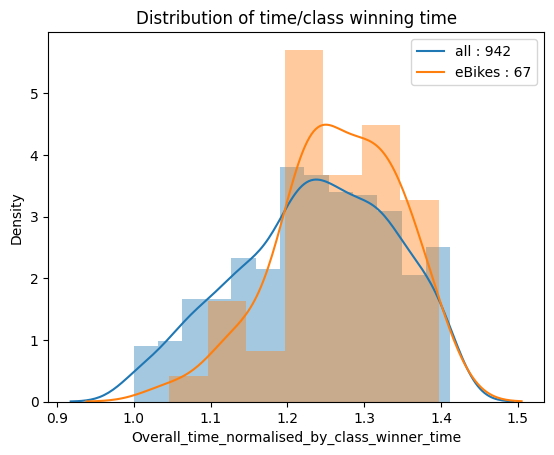

In [31]:
#distributions of the stages in one plot
percentile = 0.75
fig = plt.figure()
numEbikes= np.sum(df['eBike']=='E')
numNonEbikes= np.sum(df['eBike'] !='E')
sns.distplot(percentileClipped(percentile, df[classNormStages[0]]))
sns.distplot(percentileClipped(percentile, df[df['eBike']=='E'][classNormStages[0]]))
plt.legend(['all : ' + str(numEbikes+numNonEbikes), 'eBikes : ' + str(numEbikes)])
_= plt.title('Distribution of time/class winning time')

<font size="5">How did the top 75% of overall times compare to the fastest by stage? </font> 
  
<font size="3">Stages with greater range are the most important and most difficult (as they have the largest percent gap between the fastest and slowest riders).
Stage 2 had the greatest range (over 50% between class winner and 75th percent finisher). Stages 1, 3 and 7 were all between 40-50%. On 5 and 6 the 75th percent rider was just 25% slower than the winner.  </font>

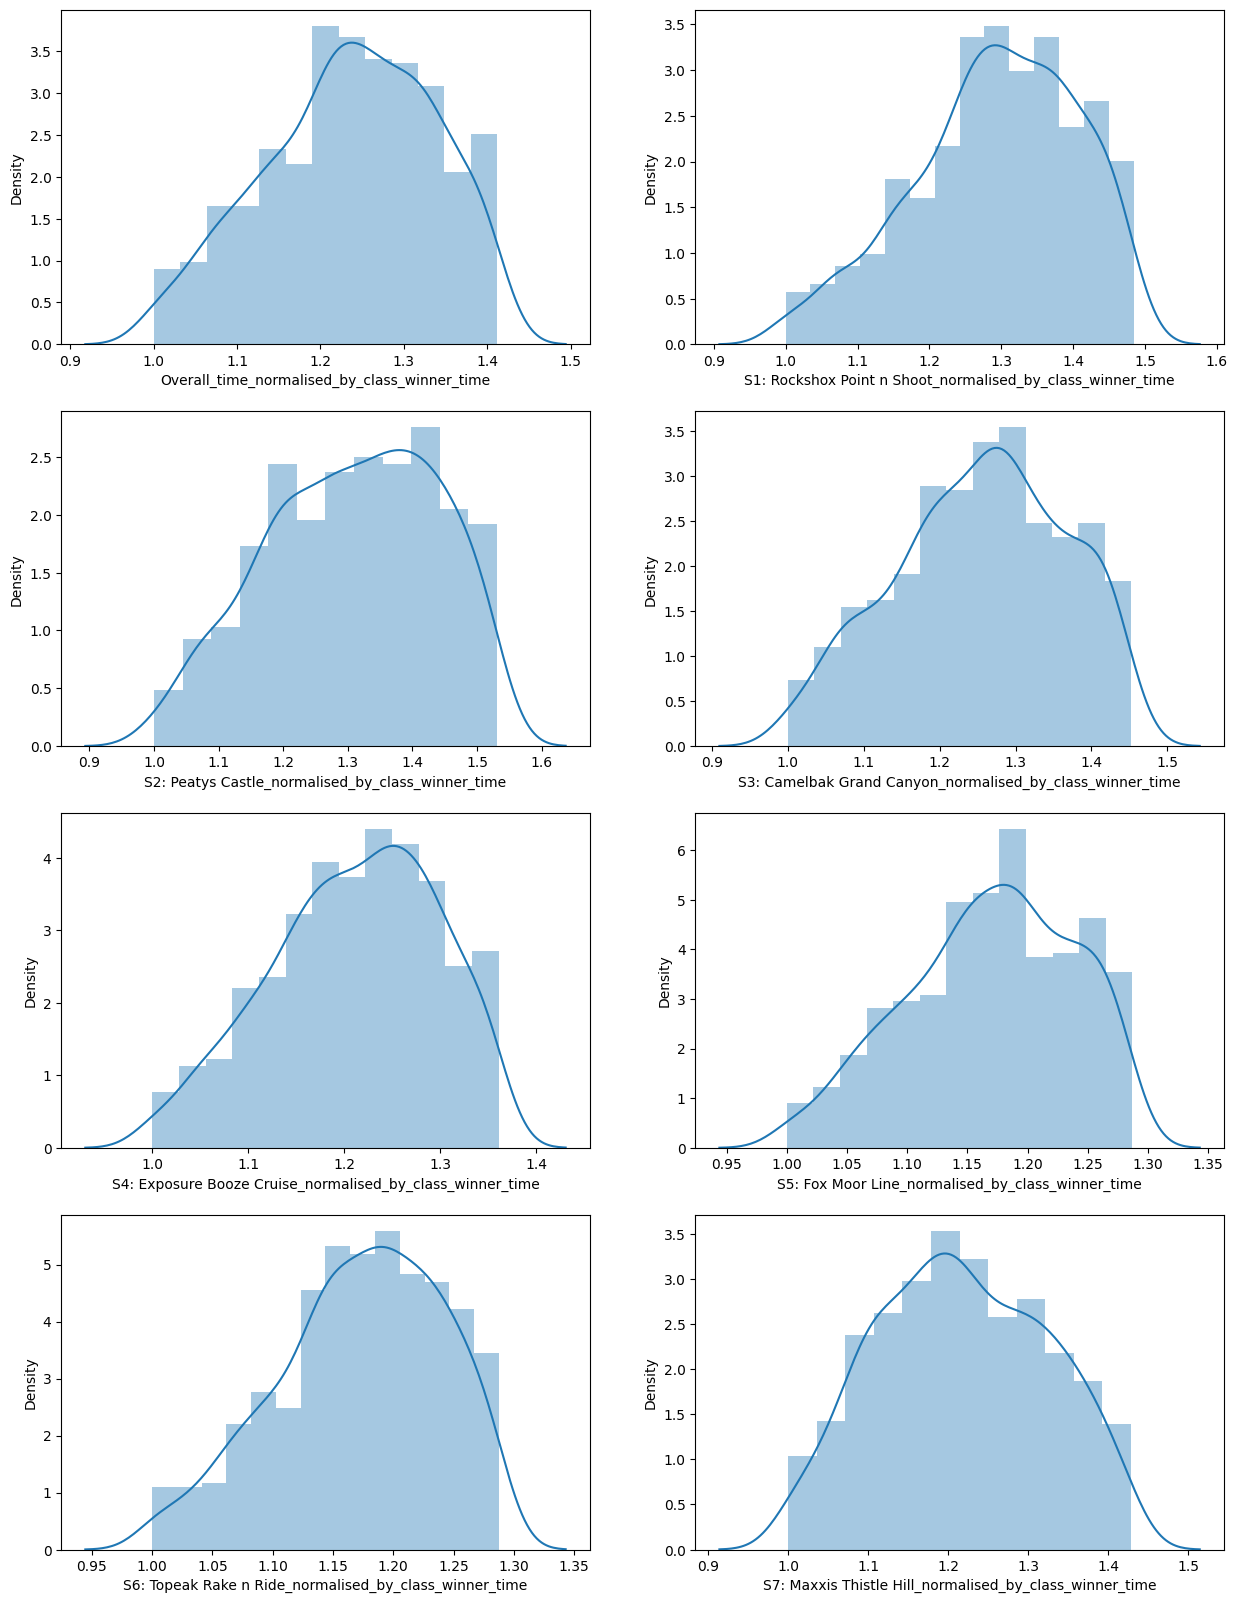

In [32]:
#distributions of the stages in one plot
percentile = 0.75
fig = plt.figure()

for i in range(len(stages)):
    fig.add_subplot(4,2,i+1)
    sns.distplot(percentileClipped(percentile, df[classNormStages[i]]))
    
fig.set_figwidth(15)
fig.set_figheight(20)

In [33]:
dfStageNorms = df[normStages[1:]]
df['Median'] = dfStageNorms.median(axis=1)
df['Min'] = dfStageNorms.min(axis=1)
df['StdDev'] = dfStageNorms.std(axis=1)

dfStageClassNorms = df[classNormStages[1:]]
df['Median_Class_Normalised'] = dfStageClassNorms.median(axis=1)
df['Min_Class_Normalised'] = dfStageClassNorms.min(axis=1)
df['Std_Class_Normalised'] = dfStageClassNorms.std(axis=1)

#classNormStages

In [34]:
def calculatePositionOnSorted(measure):
    position = pd.Series(np.arange(pd.Series.count(df[measure])) + 1)
    sameMeasure = (df[measure] == df[measure].shift(1))

    j = [1]
    def previousPosIfEqual(i):
        if sameMeasure[i]:
            return j[0]
        else:
            j[0] = position[i]
            return position[i]
    
    pos  = [previousPosIfEqual(i) for i in (np.arange(pd.Series.count(df[measure])))]
    return pos

def addPositions(measure):
    df.sort_values(measure, inplace=True)
    name = 'Pos' + measure
    df[name] = calculatePositionOnSorted(measure)
    return name

positionFields = [addPositions(m) for m in ['Overall_time_normalised', 'Overall_time_normalised_by_class_winner_time', 'Median', 'Median_Class_Normalised',]]
df.sort_values('Overall_time_normalised', inplace=True)

<font size="5">Who were the class winners? </font>

In [35]:
dataToView = [ 'Name', 'Class', 'Overall_time'] + list(normStages) + classNormStages + ['Median', 'Median_Class_Normalised', 'Min', 'Min_Class_Normalised']  + positionFields                                          
dataToView
dfToView = df[dataToView]

#the class winners
dfToView[dfToView['Overall_time_normalised_by_class_winner_time'] < 1.000001][['Name', 'Class', 'Overall_time']]

,Name,Class,Overall_time
Pos,,,
1st,Fergus Lamb,Enduro | Master Male (30-39),18:40.6
3rd,Joe Connel,Enduro | Senior Male (18-29),19:12.3
12th,Scott Edgworth,Enduro | Veteran Male (40-49),19:48.8
56th,Nigel Page,Enduro | Grand Vet Male (50+),20:55.1
113th,George Swift,Enduro | Senior Female (18-29),21:54.6
144th,Jessica Stone,Enduro | Master Female (30-39),22:21.0
255th,Helen Gaskell,Enduro | Veteran Female(40-49),23:33.6
814th,Josie Herbert,Enduro | Grand Vet Female(50+),33:17.6


<font size="5">What if we discard outlying stages? </font>
  
<font size="3">If we take the stage results for each rider and pick only their middle result (the median), we discard any outlying slow (or fast) stages.
The top 10 riders by class median are shown below. Polly Henderson and Sean Robinson appear among the very best now with median times of 1.0- meaning their middle results were the fastest in their classes. By this metric, Jake Ebdon just pips class winner Joe Connel in the Senior Male.</font>

In [36]:
# who were the top 10 median by class?
dfToView.sort_values('Median_Class_Normalised')[['Name', 'Class','Median_Class_Normalised', 'Overall_time']][0:10]

,Name,Class,Median_Class_Normalised,Overall_time
Pos,,,,
1st,Fergus Lamb,Enduro | Master Male (30-39),1.000000,18:40.6
255th,Helen Gaskell,Enduro | Veteran Female(40-49),1.000000,23:33.6
814th,Josie Herbert,Enduro | Grand Vet Female(50+),1.000000,33:17.6
114th,Polly Henderson,Enduro | Senior Female (18-29),1.000000,21:55.7
56th,Nigel Page,Enduro | Grand Vet Male (50+),1.000000,20:55.1
13th,Sean Robinson,Enduro | Veteran Male (40-49),1.000000,19:49.7
7th,Jake Ebdon,Enduro | Senior Male (18-29),1.010408,19:35.4
3rd,Joe Connel,Enduro | Senior Male (18-29),1.011468,19:12.3
2nd,Marc Beaumont,Enduro | Master Male (30-39),1.011640,19:02.2


In [37]:

#competitors_list = mr.Text(label="Which competitors would you like to compare?", value="Steve Peat, Jono Jones, Josh Bryceland, Danny Macaskill, Polly Henderson, Joe Barnes")
competitors_list = mr.Text(label="Which competitors would you like to compare?", value="Bill Mulholland, Rowland Jowett, Amy Jones, John Barwood, Matt Hoddinott, Philip Taylor, Mollie Leverton, Steffan Jones")

mercury.Text

In [38]:
competitors_list = competitors_list.value.split(', ')

<font size="5">Section 2: Comparison of named competitors list</font>
  
<font size="3">Results ordered by overall time  </font>

In [39]:
#index by name and select our group
dataNamed = dfToView.set_index('Name')

d = dataNamed.loc[competitors_list]

#show results ordered by race time
d.sort_values('Overall_time_normalised')[[ 'Class', 'Overall_time', 'Overall_time_normalised']]

,Class,Overall_time,Overall_time_normalised
Name,,,
Matt Hoddinott,Enduro | Veteran Male (40-49),23:04.1,1.235142
Rowland Jowett,Enduro | Veteran Male (40-49),23:09.3,1.239782
Bill Mulholland,Enduro | Veteran Male (40-49),23:14.8,1.244690
John Barwood,Enduro | Veteran Male (40-49),25:02.2,1.340532
Philip Taylor,Enduro | Veteran Male (40-49),25:53.4,1.386222
Amy Jones,Enduro | Veteran Female(40-49),26:14.1,1.404694
Mollie Leverton,Enduro | Veteran Female(40-49),35:34.2,1.904515
Steffan Jones,Enduro | Veteran Male (40-49),40:16.8,2.156702


<font size="3">
  
Results ordered by overall time/class winner time  </font>

In [40]:
#show results ordered by race time
d.sort_values('Overall_time_normalised_by_class_winner_time')[[ 'Class', 'Overall_time_normalised_by_class_winner_time','Overall_time']]

,Class,Overall_time_normalised_by_class_winner_time,Overall_time
Name,,,
Amy Jones,Enduro | Veteran Female(40-49),1.113540,26:14.1
Matt Hoddinott,Enduro | Veteran Male (40-49),1.164283,23:04.1
Rowland Jowett,Enduro | Veteran Male (40-49),1.168657,23:09.3
Bill Mulholland,Enduro | Veteran Male (40-49),1.173284,23:14.8
John Barwood,Enduro | Veteran Male (40-49),1.263627,25:02.2
Philip Taylor,Enduro | Veteran Male (40-49),1.306696,25:53.4
Mollie Leverton,Enduro | Veteran Female(40-49),1.509762,35:34.2
Steffan Jones,Enduro | Veteran Male (40-49),2.032974,40:16.8


<font size="3">
  
Results ordered by the fastest time/winners time on any stage (note: winner, not class winner)</font>

In [41]:
#results ordered by min stage time/stage winners time on any stage
d.sort_values('Min')[['Class','Min','Overall_time']]

,Class,Min,Overall_time
Name,,,
Matt Hoddinott,Enduro | Veteran Male (40-49),1.161392,23:04.1
Rowland Jowett,Enduro | Veteran Male (40-49),1.178006,23:09.3
Bill Mulholland,Enduro | Veteran Male (40-49),1.178836,23:14.8
John Barwood,Enduro | Veteran Male (40-49),1.216772,25:02.2
Philip Taylor,Enduro | Veteran Male (40-49),1.267405,25:53.4
Amy Jones,Enduro | Veteran Female(40-49),1.290348,26:14.1
Mollie Leverton,Enduro | Veteran Female(40-49),1.448576,35:34.2
Steffan Jones,Enduro | Veteran Male (40-49),1.469146,40:16.8


<font size="3">
  
Results ordered by the fastest time/class winner time on any stage</font>

In [42]:
# as above but by class stage winners time
d.sort_values('Min_Class_Normalised')[['Class','Min_Class_Normalised','Overall_time']]

,Class,Min_Class_Normalised,Overall_time
Name,,,
Amy Jones,Enduro | Veteran Female(40-49),1.073733,26:14.1
Matt Hoddinott,Enduro | Veteran Male (40-49),1.137984,23:04.1
Bill Mulholland,Enduro | Veteran Male (40-49),1.142634,23:14.8
Rowland Jowett,Enduro | Veteran Male (40-49),1.154264,23:09.3
John Barwood,Enduro | Veteran Male (40-49),1.192248,25:02.2
Mollie Leverton,Enduro | Veteran Female(40-49),1.205398,35:34.2
Philip Taylor,Enduro | Veteran Male (40-49),1.241860,25:53.4
Steffan Jones,Enduro | Veteran Male (40-49),1.439535,40:16.8


<font size="3">
  
Results ordered by the median of each riders time/winner time on all stages (note winner not class winner)</font>

In [43]:
# the results sorted by median (stage time/stage winners time)
d.sort_values('Median')[['Class','Median', 'Overall_time']]

,Class,Median,Overall_time
Name,,,
Rowland Jowett,Enduro | Veteran Male (40-49),1.223229,23:09.3
Bill Mulholland,Enduro | Veteran Male (40-49),1.223523,23:14.8
Matt Hoddinott,Enduro | Veteran Male (40-49),1.242941,23:04.1
John Barwood,Enduro | Veteran Male (40-49),1.333333,25:02.2
Philip Taylor,Enduro | Veteran Male (40-49),1.351171,25:53.4
Amy Jones,Enduro | Veteran Female(40-49),1.414286,26:14.1
Mollie Leverton,Enduro | Veteran Female(40-49),1.830159,35:34.2
Steffan Jones,Enduro | Veteran Male (40-49),1.844125,40:16.8


<font size="3">
  
Results ordered by the median of each riders time/class winner time on all stages</font>

In [44]:

dz = d.sort_values('Median_Class_Normalised')[['Class','Median_Class_Normalised', 'Overall_time']] #['Class', 'Time', 'TimeNorm', 'TimeNormClassNorm', 'Median', 'MedianClassNorm' , 'Min' , 'MinClassNorm']
dz

,Class,Median_Class_Normalised,Overall_time
Name,,,
Amy Jones,Enduro | Veteran Female(40-49),1.111034,26:14.1
Rowland Jowett,Enduro | Veteran Male (40-49),1.171265,23:09.3
Matt Hoddinott,Enduro | Veteran Male (40-49),1.178283,23:04.1
Bill Mulholland,Enduro | Veteran Male (40-49),1.187597,23:14.8
Philip Taylor,Enduro | Veteran Male (40-49),1.280393,25:53.4
John Barwood,Enduro | Veteran Male (40-49),1.283895,25:02.2
Mollie Leverton,Enduro | Veteran Female(40-49),1.453361,35:34.2
Steffan Jones,Enduro | Veteran Male (40-49),1.728090,40:16.8
